In [ ]:
# For COLAB use only

from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Mini Project/None_set.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/content') # Extracts the files into the /tmp folder
zip_ref1 = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Mini Project/test_set.zip', 'r') # Opens the zip file in read mode
zip_ref1.extractall('/content') # Extracts the files into the /tmp folder
zip_ref.close()
zip_ref1.close()

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# define the image size and batch size
img_size = (40, 40)
batch_size = 32

# Path to your datasets folder
data_dir = "/content/None_set"
test_dir = "/content/test_set"

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory( # training set
    data_dir,
    labels= "inferred",
    color_mode='grayscale',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory( # testing set
    data_dir,
    labels= "inferred",
    color_mode='grayscale',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

Found 21275 files belonging to 9 classes.
Using 17020 files for training.
Found 21275 files belonging to 9 classes.
Using 4255 files for validation.


In [ ]:
# inspect the class names and number of classes
class_names = train_ds.class_names
num_classes = len(class_names)
print('Class names:', class_names)
print('Number of classes:', num_classes)

Class names: ['0', '1', '2', '3', '4', '5', '6', '7', 'None']
Number of classes: 9


Training Set


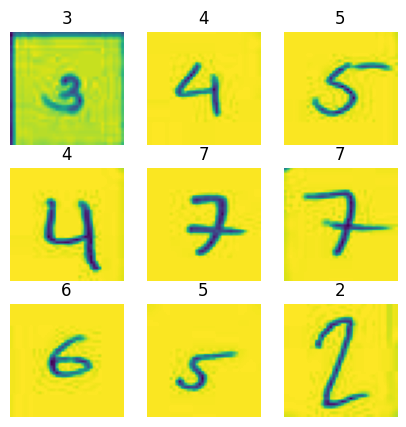

In [ ]:
print("Training Set")
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Validation Set


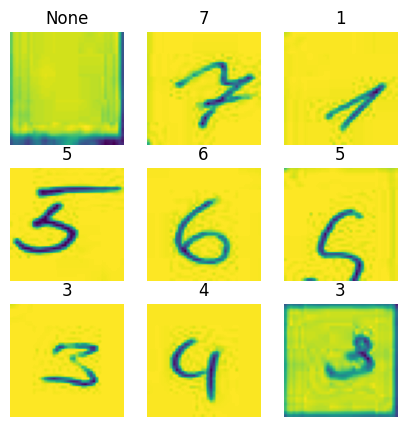

In [ ]:
print("Validation Set")
plt.figure(figsize=(5, 5))
for images, labels in val_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# create the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(40, 40, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    # tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


# Step 1: Input Layer
# You provide a grayscale image with dimensions 40 by 40 (1 channel for grayscale). The input shape of the model is (40, 40, 1).

# Step 2: Convolutional Layer 1
# A convolutional layer with 16 filters and a filter/kernel size of 3x3 is applied to the input image. The activation function used is ReLU. This layer performs convolutional operations on the input image, extracting features using the 16 filters. The output shape after this layer is (38, 38, 16) since the convolution operation reduces the spatial dimensions.

# Step 3: Max Pooling Layer 1
# A max pooling operation is applied to the output of the previous layer. It reduces the spatial dimensions by selecting the maximum value within a 2x2 pooling region. The output shape after this layer is (19, 19, 16) since the max pooling operation halves the spatial dimensions.

# Step 4: Convolutional Layer 2
# A convolutional layer with 32 filters and a filter/kernel size of 3x3 is applied to the output of the previous layer. The activation function used is ReLU. This layer further extracts more complex features from the previous layer's output. The output shape after this layer is (17, 17, 32).

# Step 5: Max Pooling Layer 2
# A max pooling operation is applied to the output of the previous layer. Similar to the previous max pooling layer, it reduces the spatial dimensions by selecting the maximum value within a 2x2 pooling region. The output shape after this layer is (8, 8, 32).

# Step 6: Convolutional Layer 3
# A convolutional layer with 64 filters and a filter/kernel size of 3x3 is applied to the output of the previous layer. The activation function used is ReLU. This layer continues to extract higher-level features from the previous layer's output. The output shape after this layer is (6, 6, 64).

# Step 7: Flatten Layer
# The output from the previous layer is flattened into a 1-dimensional vector. The output shape after this layer is (2304), which represents a flattened version of the previous layer's output.

# Step 8: Dense Layer 1
# A fully connected dense layer with 64 units/neurons is applied to the flattened output from the previous layer. The activation function used is ReLU. This layer performs a linear transformation and introduces non-linearity to the data.

# Step 9: Dense Layer 2 (Output Layer)
# The final dense layer with num_classes units/neurons is applied. This layer uses the softmax activation function, which produces a probability distribution over the num_classes output classes. The output shape after this layer is equal to the number of classes you have.

# Overall, the model takes a 40 by 40 grayscale image as input and passes it through several convolutional and pooling layers to extract features. Then, it flattens the output and passes it through fully connected layers, ultimately producing class probabilities for the given input image.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # compiling the model

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=30) # Fitting the model into training data

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


532/532 [==============================] - 17s 10ms/step - loss: 1.1657 - accuracy: 0.6746 - val_loss: 0.4708 - val_accuracy: 0.8510
Epoch 2/30
532/532 [==============================] - 3s 6ms/step - loss: 0.2925 - accuracy: 0.9141 - val_loss: 0.2609 - val_accuracy: 0.9159
Epoch 3/30
532/532 [==============================] - 4s 7ms/step - loss: 0.1768 - accuracy: 0.9486 - val_loss: 0.2089 - val_accuracy: 0.9377
Epoch 4/30
532/532 [==============================] - 5s 9ms/step - loss: 0.1217 - accuracy: 0.9635 - val_loss: 0.1633 - val_accuracy: 0.9584
Epoch 5/30
532/532 [==============================] - 4s 7ms/step - loss: 0.1009 - accuracy: 0.9677 - val_loss: 0.1613 - val_accuracy: 0.9565
Epoch 6/30
532/532 [==============================] - 4s 8ms/step - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.1748 - val_accuracy: 0.9561
Epoch 7/30
532/532 [==============================] - 5s 9ms/step - loss: 0.0711 - accuracy: 0.9784 - val_loss: 0.1559 - val_accuracy: 0.9596
Epoch 8/30
532/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [ ]:
_, train_acc = model.evaluate(train_ds, verbose=0)
_, val_acc = model.evaluate(val_ds, verbose=0)

print(f'Training Accuracy: {(train_acc * 100):.2f}%\nValidation Accuracy: {(val_acc * 100):.2f}%')

Training Accuracy: 99.50%
Validation Accuracy: 97.30%


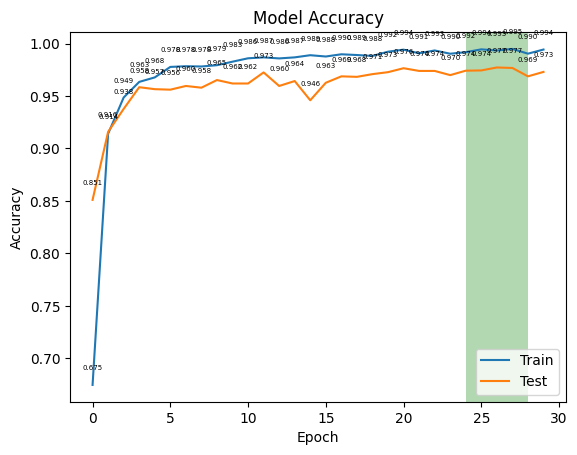

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

# Add annotations to display y-axis values at the top of each point
for i, acc in enumerate(history.history['accuracy']):
    plt.annotate('{:.3f}'.format(acc), (i, acc), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=5)
for i, val_acc in enumerate(history.history['val_accuracy']):
    plt.annotate('{:.3f}'.format(val_acc), (i, val_acc), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=5)

# Find epoch with highest validation accuracy
best_epoch = np.argmax(history.history['val_accuracy'])

# Highlight region around best epoch
plt.axvspan(best_epoch - 2, best_epoch + 2, facecolor='green', alpha=0.3)

plt.show()

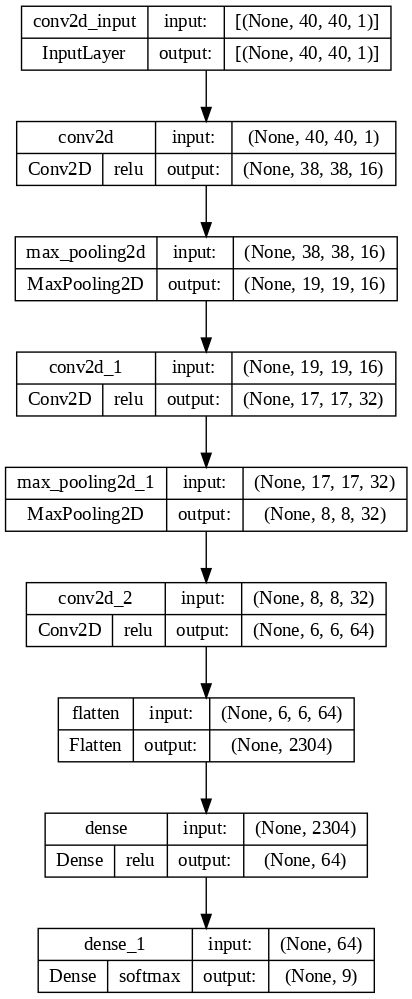

In [ ]:
# For visualizing the model

from keras.utils.vis_utils import plot_model
plot_model(model,
           to_file='model.png',
           show_shapes=True,
           show_dtype=False,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=False,
           dpi=100,
           layer_range=None,
           show_layer_activations=True
          )

In [ ]:
model.save('MP_Latest_Model.h5')

Testing the model using the `model` variable in the above code,
and displaying metrics like `Confusion Matrix` and `Classification Report` of the same. Thus training, validation & testing in the same code

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    color_mode='grayscale',
    validation_split=0.99,
    subset='validation',  # Use 'validation' as the subset for the test dataset
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 1800 files belonging to 9 classes.
Using 1782 files for validation.


Testing Set


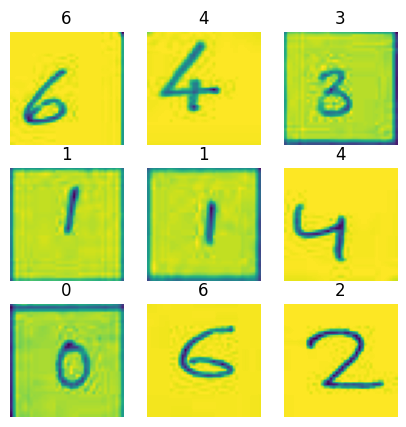

In [ ]:
import matplotlib.pyplot as plt

print("Testing Set")
plt.figure(figsize=(5, 5))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Change path to dataset here ↓
img_dirs = [f"/content/test_set/{i}" for i in range(9)]
img_dir_0, img_dir_1, img_dir_2, img_dir_3, img_dir_4, img_dir_5, img_dir_6, img_dir_7, img_dir_8 = img_dirs

# Declaring images in each folder and their ground truth as a list
image_list_0, image_list_1, image_list_2, image_list_3, image_list_4, image_list_5, image_list_6, image_list_7, image_list_8 = [os.listdir(dir) for dir in img_dirs]

gnd_trt_0, gnd_trt_1, gnd_trt_2, gnd_trt_3, gnd_trt_4, gnd_trt_5, gnd_trt_6, gnd_trt_7, gnd_trt_8 = [i for i in range(9)]

In [ ]:
def prediction(image_folder, image_list):
    pred = []

    # Loop through all the images in the folder and classify them
    for image_name in image_list:

        test_image = tf.keras.preprocessing.image.load_img(os.path.join(image_folder, image_name), target_size=(40, 40), color_mode='grayscale')
        test_image = np.expand_dims(test_image, axis=0) # Expand the dimensions of the image to match the input shape of the model

        result = model.predict(test_image)

        predicted_value = np.argmax(result[0])

        pred.append(predicted_value)

#         pred = ['None' if x == 8 else x for x in pred]

    return pred

In [ ]:
def accuracy(gnd_trt, image_list, preds): # Accuracy calculation
    true_labels = [gnd_trt] * len(image_list)
    correct_predictions = sum(preds[i] == true_labels[i] for i in range(len(image_list)))
    accuracy_percent = (correct_predictions / len(true_labels)) * 100
    return accuracy_percent

In [ ]:
preds_0 = prediction(img_dir_0, image_list_0)
preds_1 = prediction(img_dir_1, image_list_1)
preds_2 = prediction(img_dir_2, image_list_2)
preds_3 = prediction(img_dir_3, image_list_3)
preds_4 = prediction(img_dir_4, image_list_4)
preds_5 = prediction(img_dir_5, image_list_5)
preds_6 = prediction(img_dir_6, image_list_6)
preds_7 = prediction(img_dir_7, image_list_7)
preds_8 = prediction(img_dir_8, image_list_8)

1/1 [==============================] - 0s 18ms/step


In [ ]:
for i in range(9): # Hard coded, as we know the no of classes
    print(f"Total images in {i} : {len(locals()[f'image_list_{i}'])}")
    # locals() method returns a dictionary with all the local variables for the current program.

Total images in 0 : 200
Total images in 1 : 200
Total images in 2 : 200
Total images in 3 : 200
Total images in 4 : 200
Total images in 5 : 200
Total images in 6 : 200
Total images in 7 : 200
Total images in 8 : 200


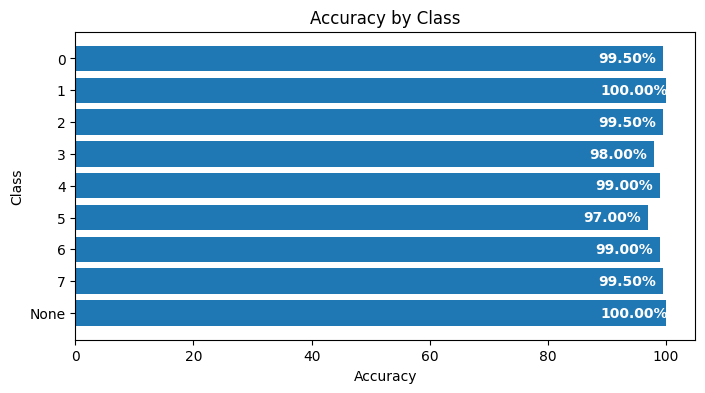

In [ ]:
acc=[
accuracy(gnd_trt_0, image_list_0, preds_0),
accuracy(gnd_trt_1, image_list_1, preds_1),
accuracy(gnd_trt_2, image_list_2, preds_2),
accuracy(gnd_trt_3, image_list_3, preds_3),
accuracy(gnd_trt_4, image_list_4, preds_4),
accuracy(gnd_trt_5, image_list_5, preds_5),
accuracy(gnd_trt_6, image_list_6, preds_6),
accuracy(gnd_trt_7, image_list_7, preds_7),
accuracy(gnd_trt_8, image_list_8, preds_8),
]

import matplotlib.pyplot as plt

labels = [f'{i}' for i in range(9)]
labels[8] = 'None'
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(labels, acc, align='center')

# Add axis labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Class')
ax.set_title('Accuracy by Class')

ax.invert_yaxis() # Invert y-axis to list classes from top to bottom

for i, acc in enumerate(acc):
    ax.text(acc -11, i, f'{acc:.2f}%', va='center',weight='bold',color='white')
plt.show()

In [ ]:
pd = [[] for _ in range(9)]

for i in range(9):
    pred_len = len(locals()[f'preds_{i}'])
    for j in range(pred_len):
        pd[i].append(i)

In [ ]:
y_true = np.concatenate([pd[i] for i in range(9)])
y_pred = np.concatenate([preds_0,preds_1,preds_2,preds_3,preds_4,preds_5,preds_6,preds_7,preds_8])

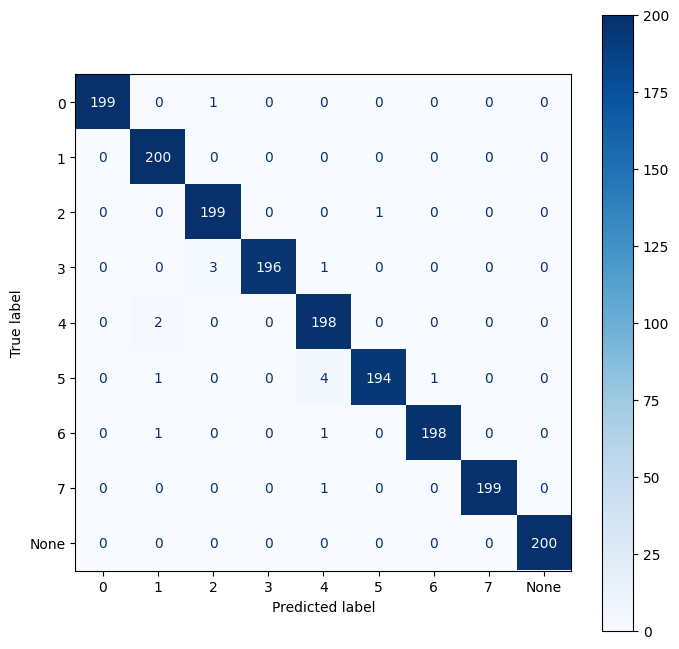

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', 'None']

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

In [ ]:
clsf_report = classification_report(y_true, y_pred, output_dict=True)
clsf_report

{'0': {'precision': 1.0,
  'recall': 0.995,
  'f1-score': 0.9974937343358395,
  'support': 200},
 '1': {'precision': 0.9803921568627451,
  'recall': 1.0,
  'f1-score': 0.99009900990099,
  'support': 200},
 '2': {'precision': 0.9802955665024631,
  'recall': 0.995,
  'f1-score': 0.9875930521091811,
  'support': 200},
 '3': {'precision': 1.0,
  'recall': 0.98,
  'f1-score': 0.98989898989899,
  'support': 200},
 '4': {'precision': 0.9658536585365853,
  'recall': 0.99,
  'f1-score': 0.9777777777777777,
  'support': 200},
 '5': {'precision': 0.9948717948717949,
  'recall': 0.97,
  'f1-score': 0.9822784810126582,
  'support': 200},
 '6': {'precision': 0.9949748743718593,
  'recall': 0.99,
  'f1-score': 0.9924812030075189,
  'support': 200},
 '7': {'precision': 1.0,
  'recall': 0.995,
  'f1-score': 0.9974937343358395,
  'support': 200},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 200},
 'accuracy': 0.9905555555555555,
 'macro avg': {'precision': 0.9907097834606053,
  'r

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format

clsf_df = pd.DataFrame(clsf_report)
clsf_df

,0,1,2,3,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,1.000,0.980,0.980,1.000,0.966,0.995,0.995,1.000,1.000,0.991,0.991,0.991
recall,0.995,1.000,0.995,0.980,0.990,0.970,0.990,0.995,1.000,0.991,0.991,0.991
f1-score,0.997,0.990,0.988,0.990,0.978,0.982,0.992,0.997,1.000,0.991,0.991,0.991
support,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,0.991,1800.000,1800.000


In [ ]:
clsf_df = clsf_df[:-1]
clsf_df = clsf_df.iloc[:, :-2]

clsf_df

,0,1,2,3,4,5,6,7,8,accuracy
precision,1.000,0.980,0.980,1.000,0.966,0.995,0.995,1.000,1.000,0.991
recall,0.995,1.000,0.995,0.980,0.990,0.970,0.990,0.995,1.000,0.991
f1-score,0.997,0.990,0.988,0.990,0.978,0.982,0.992,0.997,1.000,0.991
